# Basic usage of modified transformers library (modification have been done only for BERT)

## Install the changed library (only first once)

## Usage

In [18]:
# for OPT

In [4]:
import torch
import transformers
from transformers import AutoModelForCausalLM, AutoTokenizer


In [5]:
device_map = {
    'model.decoder.embed_tokens': 0,
    'model.decoder.embed_positions': 0,
    'model.decoder.final_layer_norm': 0,
    'model.decoder.layers.0': 0,
    'model.decoder.layers.1': 0,
    'model.decoder.layers.2': 0,
    'model.decoder.layers.3': 0,
    'model.decoder.layers.4': 0,
    'model.decoder.layers.5': 0,
    'model.decoder.layers.6': 0,
    'model.decoder.layers.7': 0,
    'model.decoder.layers.8': 0,
    'model.decoder.layers.9': 0,
    'model.decoder.layers.10': 0,
    'model.decoder.layers.11': 0,
    'model.decoder.layers.12': 0,
    'model.decoder.layers.13': 0,
    'model.decoder.layers.14': 0,
    'model.decoder.layers.15': 0,
    'model.decoder.layers.16': 0,
    'model.decoder.layers.17': 0,
    'model.decoder.layers.18': 0,
    'model.decoder.layers.19': 0,
    'model.decoder.layers.20': 0,
    'model.decoder.layers.21': 0,
    'model.decoder.layers.22': 0,
    'model.decoder.layers.23': 0,
    'model.decoder.layers.24': 1,
    'model.decoder.layers.25': 1,
    'model.decoder.layers.26': 1,
    'model.decoder.layers.27': 1,
    'model.decoder.layers.28': 1,
    'model.decoder.layers.29': 1,
    'model.decoder.layers.30': 1,
    'model.decoder.layers.31': 1,
    'model.decoder.layers.32': 1,
    'model.decoder.layers.33': 1,
    'model.decoder.layers.34': 1,
    'model.decoder.layers.35': 1,
    'model.decoder.layers.36': 1,
    'model.decoder.layers.37': 1,
    'model.decoder.layers.38': 1,
    'model.decoder.layers.39': 1,
    'model.decoder.layers.40': 1,
    'model.decoder.layers.41': 1,
    'model.decoder.layers.42': 1,
    'model.decoder.layers.43': 1,
    'model.decoder.layers.44': 1,
    'model.decoder.layers.45': 1,
    'model.decoder.layers.46': 1,
    'model.decoder.layers.47': 1,
    'lm_head': 1,
    }

In [7]:
tokenizer = AutoTokenizer.from_pretrained("facebook/opt-30b", return_tensors="pt")
model = AutoModelForCausalLM.from_pretrained("facebook/opt-30b", device_map=device_map, load_in_8bit=True)
model.eval()

OPTForCausalLM(
  (model): OPTModel(
    (decoder): OPTDecoder(
      (embed_tokens): Embedding(50272, 7168, padding_idx=1)
      (embed_positions): OPTLearnedPositionalEmbedding(2050, 7168)
      (final_layer_norm): LayerNorm((7168,), eps=1e-05, elementwise_affine=True)
      (layers): ModuleList(
        (0): OPTDecoderLayer(
          (self_attn): OPTAttention(
            (k_proj): Linear8bitLt(in_features=7168, out_features=7168, bias=True)
            (v_proj): Linear8bitLt(in_features=7168, out_features=7168, bias=True)
            (q_proj): Linear8bitLt(in_features=7168, out_features=7168, bias=True)
            (out_proj): Linear8bitLt(in_features=7168, out_features=7168, bias=True)
          )
          (activation_fn): ReLU()
          (self_attn_layer_norm): LayerNorm((7168,), eps=1e-05, elementwise_affine=True)
          (fc1): Linear8bitLt(in_features=7168, out_features=28672, bias=True)
          (fc2): Linear8bitLt(in_features=28672, out_features=7168, bias=True)
      

In [8]:
prompt = "robot must obey orders given to it"
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

In [9]:
outputs = model(**inputs, output_attentions=True)

In [10]:
attentions = outputs.attentions

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the layer and head you want to check. (layer: 1~12, head: 1~12)
layer = 7
head = 5

In [13]:
# Tokenize text and convert to ids.
input_ids = torch.tensor([tokenizer.encode(prompt, add_special_tokens=True)]).to("cuda")
print(input_ids)
tokenized_text = tokenizer.convert_ids_to_tokens(input_ids[0])
print(tokenized_text)

tensor([[    2,  1001, 12749,   531, 28616,  3365,   576,     7,    24]],
       device='cuda:1')
['</s>', 'ro', 'bot', 'Ġmust', 'Ġobey', 'Ġorders', 'Ġgiven', 'Ġto', 'Ġit']


### 1a OPT Attention weight visualization (Head-level visualization)

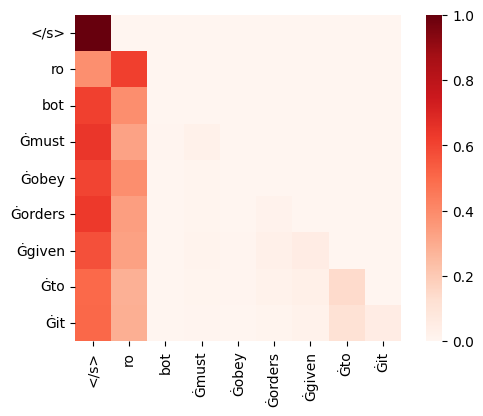

In [16]:
plt.figure() 
attention = attentions[layer-1][0][head-1].cpu().detach().numpy()
df = pd.DataFrame(attention,columns=tokenized_text,index=tokenized_text)
sns.heatmap(df,cmap="Reds",square=True)
plt.gcf().subplots_adjust(bottom=0.2)

### 2a OPT Attention weight visualization (Layer-level visualization)

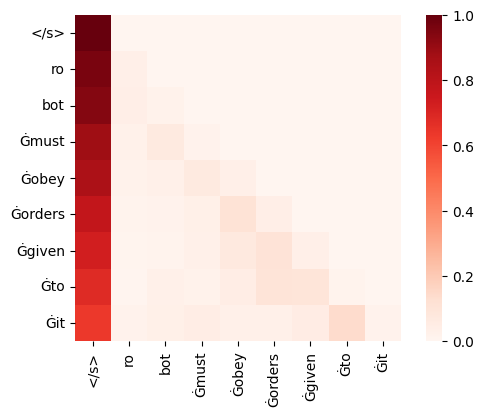

In [64]:
plt.figure() 
attention = attentions[layer-1][0].mean(0).detach().numpy()
df = pd.DataFrame(attention,columns=tokenized_text,index=tokenized_text)
sns.heatmap(df,cmap="Reds",square=True)
plt.gcf().subplots_adjust(bottom=0.2)

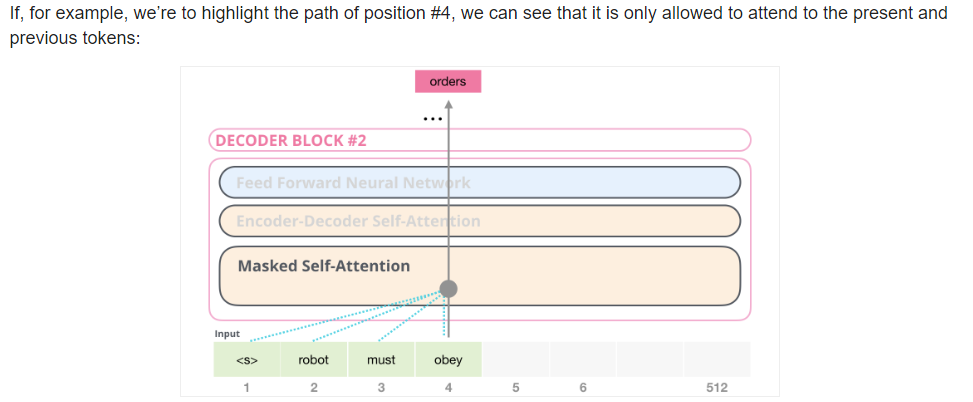

https://jalammar.github.io/illustrated-gpt2/ for understanding attentions in decoder only models